<a href="https://colab.research.google.com/github/SisekoC/OpenCV/blob/main/1_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ingest the data

In [ ]:
import pandas as pd

### Introduction About the Data :

**The dataset** The goal is to predict `price` of given diamond (Regression Analysis).

There are 10 independent variables (including `id`):

* `id` : unique identifier of each diamond
* `carat` : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
* `cut` : Quality of Diamond Cut
* `color` : Color of Diamond
* `clarity` : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
* `depth` : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
* `table` : A diamond's table is the facet which can be seen when the stone is viewed face up.
* `x` : Diamond X dimension
* `y` : Diamond Y dimension
* `x` : Diamond Z dimension

Target variable:
* `price`: Price of the given Diamond.

Dataset Source Link :
[https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv](https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv)

I have solved EDA step by step

In [ ]:
data=pd.read_csv("train.csv")

In [ ]:
data.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619.0
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387.0
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772.0
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666.0
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453.0


In [ ]:
data.tail()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
78427,78427,1.54,Premium,I,VS2,62.2,59.0,7.33,7.37,4.57,9089.0
78428,78428,0.51,Very Good,H,SI1,62.4,55.0,5.12,5.14,3.20,1348.0
78429,78429,1.26,Premium,E,VS1,61.0,58.0,6.99,7.03,4.26,11108.0
78430,78430,2.00,Good,E,SI2,64.3,54.0,7.94,7.86,5.07,17530.0
78431,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.sample(5)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
21830,21830,0.28,Ideal,F,VVS2,62.3,56.0,4.12,4.16,2.58,597.0
29780,29780,1.11,Ideal,E,SI2,62.2,55.0,6.70,6.62,4.14,5324.0
19797,19797,0.30,Premium,I,VS1,61.6,61.0,4.32,4.27,2.64,630.0
47096,47096,1.02,Ideal,F,VS2,62.6,56.0,6.43,6.38,4.01,6909.0
13037,13037,0.32,Ideal,G,IF,62.1,55.0,4.41,4.44,2.75,918.0


In [ ]:
data.isnull().sum()

,0
id,0
carat,1
cut,1
color,1
clarity,1
depth,1
table,1
x,1
y,1
z,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78432 entries, 0 to 78431
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       78432 non-null  int64  
 1   carat    78431 non-null  float64
 2   cut      78431 non-null  object 
 3   color    78431 non-null  object 
 4   clarity  78431 non-null  object 
 5   depth    78431 non-null  float64
 6   table    78431 non-null  float64
 7   x        78431 non-null  float64
 8   y        78431 non-null  float64
 9   z        78431 non-null  float64
 10  price    78431 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 6.6+ MB


In [ ]:
data=data.drop(labels=["id"],axis=1)

In [ ]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619.0
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387.0
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772.0
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666.0
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453.0


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.shape

(78432, 10)

In [ ]:
# cat and num columns

categorical_columns=data.columns[data.dtypes=="object"]

In [ ]:
numerical_columns=data.columns[data.dtypes!="object"]

In [ ]:
data[categorical_columns].describe()

,cut,color,clarity
count,78431,78431,78431
unique,5,7,8
top,Ideal,G,SI1
freq,37605,17956,21582


In [ ]:
data[categorical_columns]

,cut,color,clarity
0,Premium,F,VS2
1,Very Good,J,SI2
2,Ideal,G,VS1
3,Ideal,G,VS1
4,Premium,G,VS2
...,...,...,...
78427,Premium,I,VS2
78428,Very Good,H,SI1
78429,Premium,E,VS1
78430,Good,E,SI2


https://www.vrai.com/journal/post/diamond-cut

In [ ]:
data[categorical_columns]["cut"].value_counts()

,count
cut,
Ideal,37605
Premium,20072
Very Good,15178
Good,4764
Fair,812


![image.png](attachment:image.png)

In [ ]:
data[categorical_columns]["color"].value_counts()

,count
color,
G,17956
E,14397
F,13955
H,12635
D,9802
I,7108
J,2578


In [ ]:
data[categorical_columns]['clarity'].value_counts()

,count
clarity,
SI1,21582
VS2,19435
VS1,12493
SI2,12204
VVS2,6442
VVS1,4304
IF,1759
I1,212


In [ ]:
data[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
carat,78431.0,0.791651,0.462948,0.20,0.40,0.70,1.03,3.40
depth,78431.0,61.818004,1.086024,52.10,61.30,61.90,62.40,69.90
table,78431.0,57.223700,1.918666,49.00,56.00,57.00,58.00,70.00
x,78431.0,5.717630,1.110356,3.75,4.70,5.71,6.52,9.43
y,78431.0,5.722391,1.103445,3.71,4.71,5.72,6.51,10.01
z,78431.0,3.535485,0.686417,0.00,2.90,3.53,4.03,8.18
price,78431.0,3979.672604,4039.760577,326.00,949.00,2415.00,5426.00,18818.00


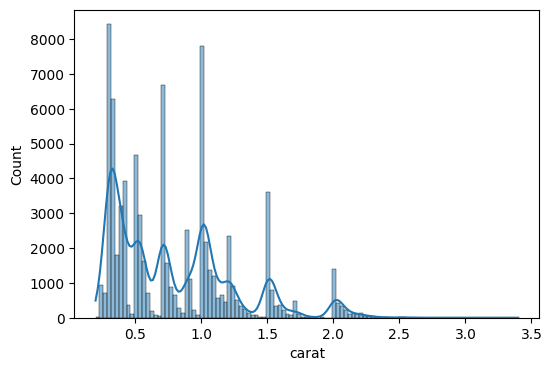

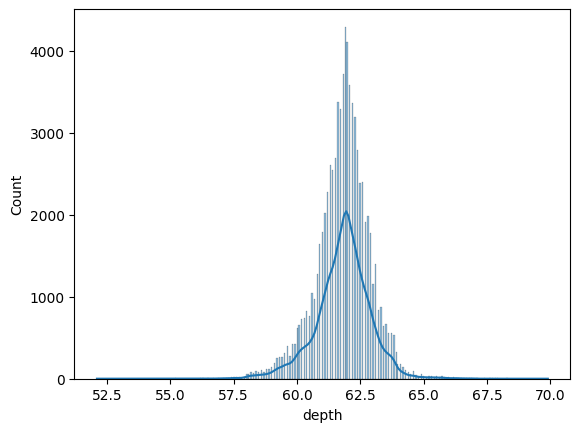

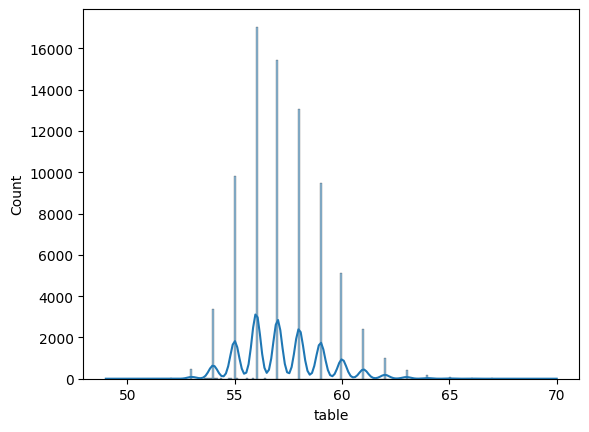

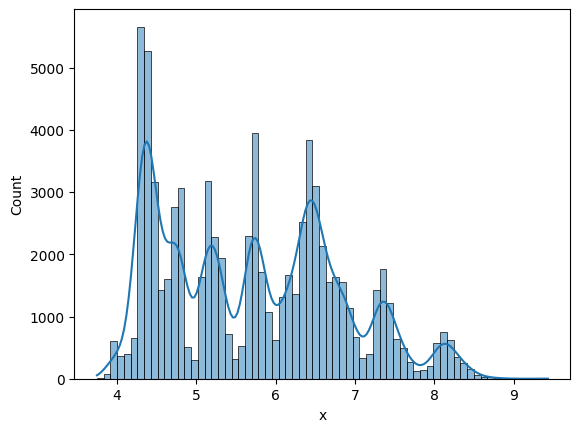

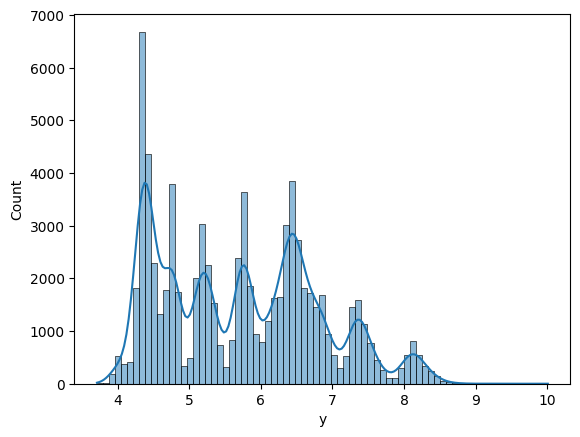

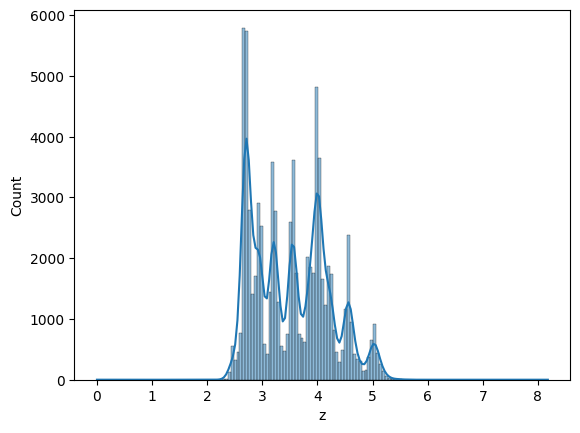

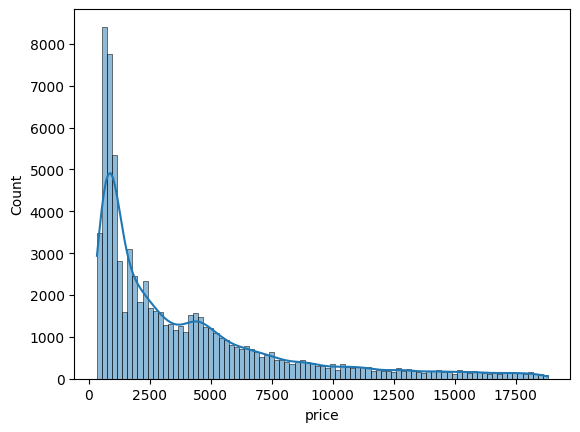

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))


for col in numerical_columns:
    sns.histplot(data=data,x=col,kde=True)
    print("\n")
    plt.show()

In [ ]:
# categorical data
# assignment is you have to take all the categorical col and you need to plot either bar plot or count

<Axes: >

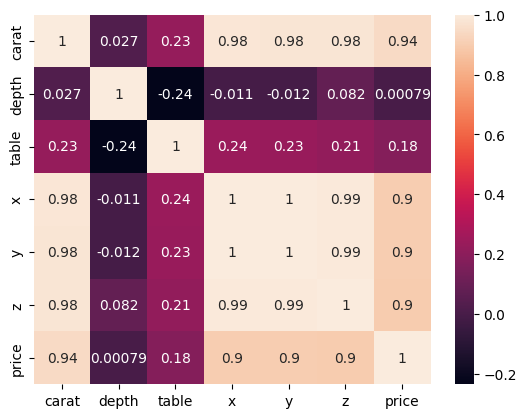

In [ ]:
sns.heatmap(data[numerical_columns].corr(),annot=True)

In [ ]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [ ]:
# encoding

data["clarity"].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1', nan],
      dtype=object)

In [ ]:

data["cut"].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair', nan], dtype=object)

In [ ]:

data["color"].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I', nan], dtype=object)

In [ ]:
# it is a oridinal encoding
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [ ]:
data["cut"]=data["cut"].map(cut_map)
data["clarity"]=data["clarity"].map(clarity_map)
data["color"]=data["color"].map(color_map)

In [ ]:
data

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4.0,3.0,4.0,62.2,58.0,7.27,7.33,4.55,13619.0
1,2.03,3.0,7.0,2.0,62.0,58.0,8.06,8.12,5.05,13387.0
2,0.70,5.0,4.0,5.0,61.2,57.0,5.69,5.73,3.50,2772.0
3,0.32,5.0,4.0,5.0,61.6,56.0,4.38,4.41,2.71,666.0
4,1.70,4.0,4.0,4.0,62.6,59.0,7.65,7.61,4.77,14453.0
...,...,...,...,...,...,...,...,...,...,...
78427,1.54,4.0,6.0,4.0,62.2,59.0,7.33,7.37,4.57,9089.0
78428,0.51,3.0,5.0,3.0,62.4,55.0,5.12,5.14,3.20,1348.0
78429,1.26,4.0,2.0,5.0,61.0,58.0,6.99,7.03,4.26,11108.0
78430,2.00,2.0,2.0,2.0,64.3,54.0,7.94,7.86,5.07,17530.0
